In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Mispriced Diamonds\Mispriced-Diamonds.csv')


In [32]:
df.shape

(53940, 3)

In [33]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


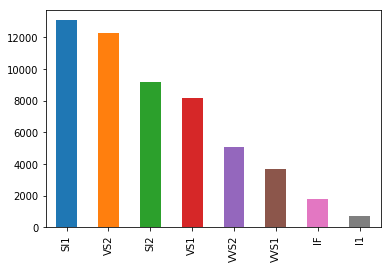

In [34]:
df['clarity'].value_counts().plot.bar()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
carat      53940 non-null float64
clarity    53940 non-null object
price      53940 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017033A0A4E0>,
      dtype=object)

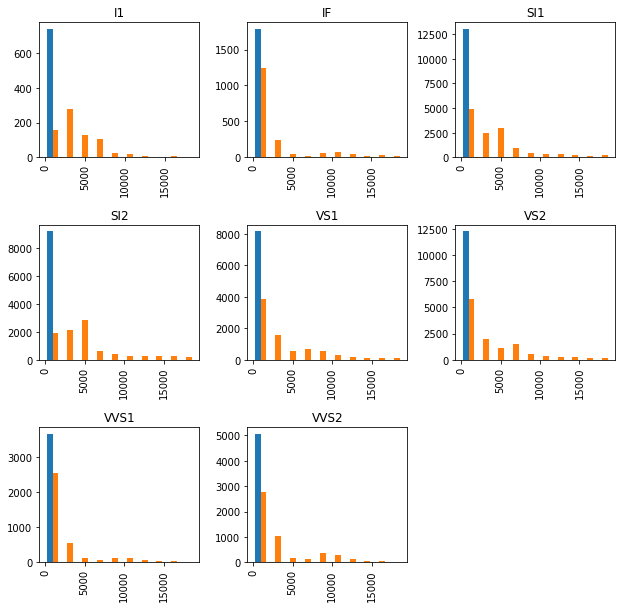

In [36]:
plt.rcParams['figure.figsize']=[10,10]
df.hist(by = 'clarity')

In [38]:
df.info

<bound method DataFrame.info of        carat clarity  price
0       0.23     SI2    326
1       0.21     SI1    326
2       0.23     VS1    327
3       0.29     VS2    334
4       0.31     SI2    335
5       0.24    VVS2    336
6       0.24    VVS1    336
7       0.26     SI1    337
8       0.22     VS2    337
9       0.23     VS1    338
10      0.30     SI1    339
11      0.23     VS1    340
12      0.22     SI1    342
13      0.31     SI2    344
14      0.20     SI2    345
15      0.32      I1    345
16      0.30     SI2    348
17      0.30     SI1    351
18      0.30     SI1    351
19      0.30     SI1    351
20      0.30     SI2    351
21      0.23     VS2    352
22      0.23     VS1    353
23      0.31     SI1    353
24      0.31     SI1    353
25      0.23    VVS2    354
26      0.24     VS1    355
27      0.30     VS2    357
28      0.23     VS2    357
29      0.23     VS1    357
...      ...     ...    ...
53910   0.70     SI1   2753
53911   0.57      IF   2753
53912   0.61    

In [39]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [40]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
df['clarity'] = encoder.fit_transform(df['clarity'])

In [41]:
df.head(5)

,carat,clarity,price
0,0.23,3,326
1,0.21,2,326
2,0.23,4,327
3,0.29,5,334
4,0.31,3,335


# Train Data 

In [42]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2 Score is ', r2_score(y_pred,y_test))
print('Mean_squared_Error', mean_squared_error(y_pred,y_test))

R2 Score is  0.8480112968818188
Mean_squared_Error 2102670.517586612


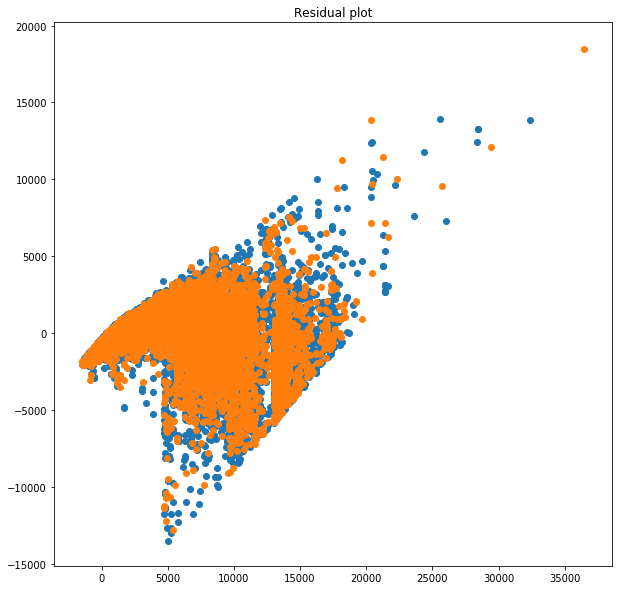

In [46]:
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(model.predict(x_train), model.predict(x_train)-y_train)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test)
plt.title('Residual plot')
plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import r2_score
print('R2 SCORE:\n',r2_score(y_pred,y_test))

R2 SCORE:
 0.9304751247187057


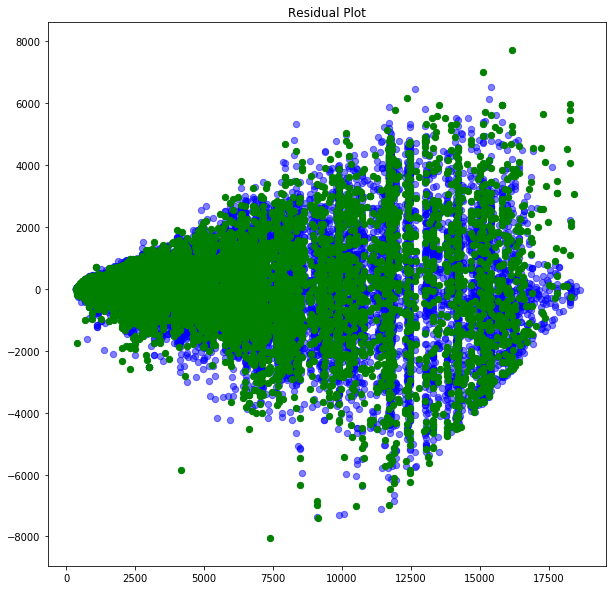

In [50]:
plt.scatter(model.predict(x_train),model.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test, c='g', s=40)
plt.title('Residual Plot')
plt.show()

In [61]:
def get_score(model,x_train,x_test,y_train, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)    

In [62]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [68]:
Scores_Linear = []
Scores_RF = []
for train_index, test_index in kf.split(df):
    x_train,x_test,y_train, y_test = x(train_index), x(test_index), y(train_index), y(test_index)

TypeError: 'DataFrame' object is not callable